## Import Packages

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style(style="whitegrid")
sns.set_color_codes(palette="dark")    
np.random.seed(141214)

## Import Data

In [6]:
data = pd.read_csv("data/data.csv") 

### Data Inspection

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [46]:
# Check for missing values.
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [18]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [14]:
data["id"].nunique()

569

Each sample represent a single case

#### Categorical variable

In [23]:
data.select_dtypes("object").columns

Index(['diagnosis'], dtype='object')

#### Numeric variables

In [26]:
data.select_dtypes("number").columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Duplicate records

In [8]:
# Check for duplicate samples
data.drop_duplicates().shape[0] == data.shape[0]

True

### Data Cleaning

In [7]:
# Drop prevoius id and unused column
data = data.drop(["id", "Unnamed: 32"], axis=1)

In [8]:
# Convert diagnosis abbrivation to full name
data["diagnosis"] = data["diagnosis"].map({"B": "Benign", "M": "Malignant"})

In [9]:
# Save Cleaned dataset
data.to_csv("data/cancer_diagnosis.csv", index=False)

In [5]:
# Load cleaned dataset
data = pd.read_csv("data/cancer_diagnosis.csv")

## EDA

### Descriptive Analysis

In [31]:
data.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [41]:
# Target variable count distribution

(
    data["diagnosis"]
        .value_counts()
        .reset_index()
        .assign(percentage = lambda _: round(_["count"] / _["count"].sum(), 3))
)

,diagnosis,count,percentage
0,Benign,357,0.627
1,Malignant,212,0.373


### Variable distribution

In [8]:
def distribution_plot(data, var:str, plt_title:str=None):

    dist_data = data[[var, "diagnosis"]]

    plt_ax_lab = str.replace(var, "_", " ").title()

    if plt_title is None:
        var_name = str.split(plt_ax_lab, ' ')[0]
        if "mean" in var:
            plt_title = f"Average Cancer {var_name}"
        elif "se" in var:
            plt_title = f"{var_name} Standard Error"
        elif "worst" in var:
            plt_title = f"the Worst Cancer {var_name}"

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

    sns.histplot(data=dist_data, x=var, hue="diagnosis", element="poly", ax=ax1)
    ax1.set_xlabel(plt_ax_lab)
    ax1.set_title(f"Distribution of {plt_title} by Diagnosis")

    sns.boxplot(data=dist_data, y=var, hue="diagnosis", ax=ax2)
    ax2.set_ylabel(plt_ax_lab)

    plt.tight_layout()

#### Average values

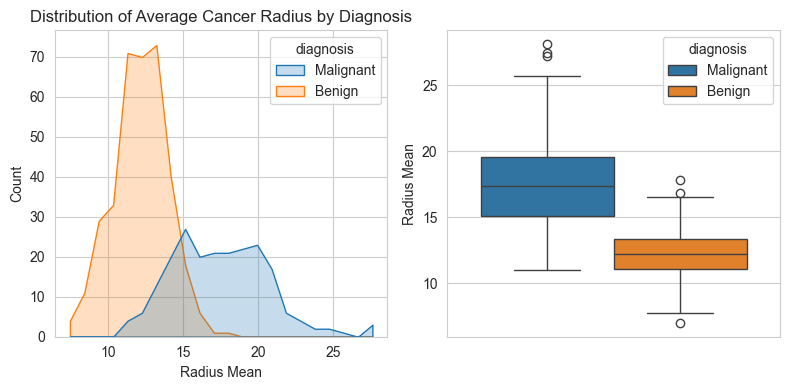

In [65]:
distribution_plot(data, "radius_mean")

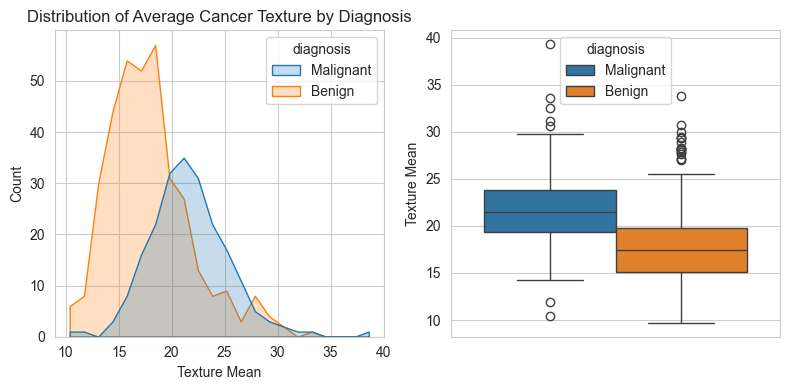

In [67]:
distribution_plot(data, "texture_mean")

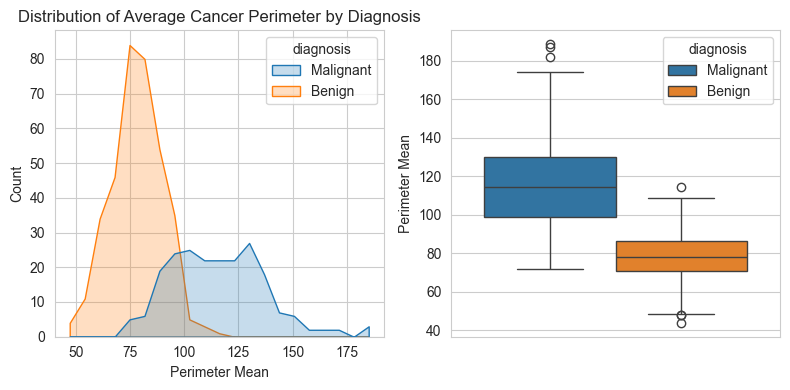

In [68]:
distribution_plot(data, "perimeter_mean")

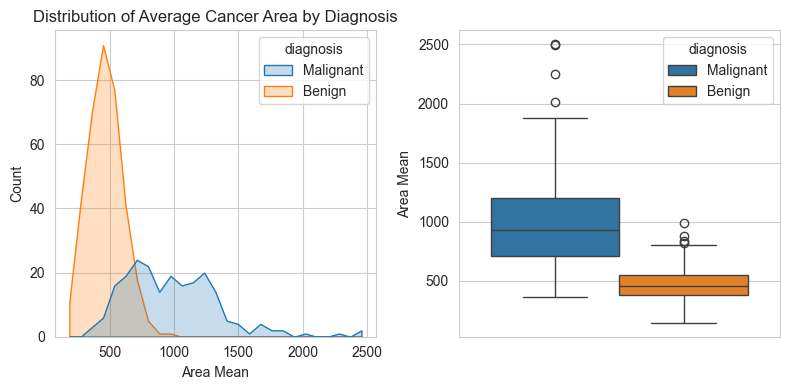

In [69]:
distribution_plot(data, "area_mean")

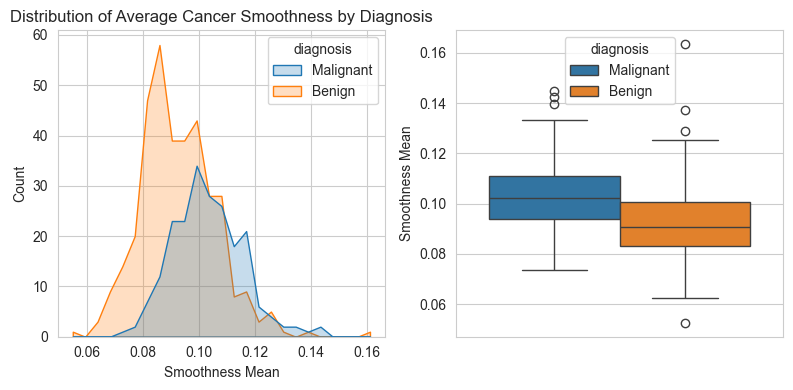

In [70]:
distribution_plot(data, "smoothness_mean")

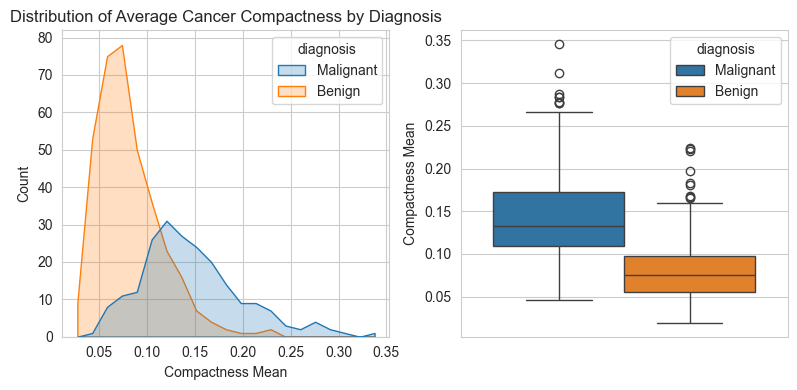

In [71]:
distribution_plot(data, "compactness_mean")

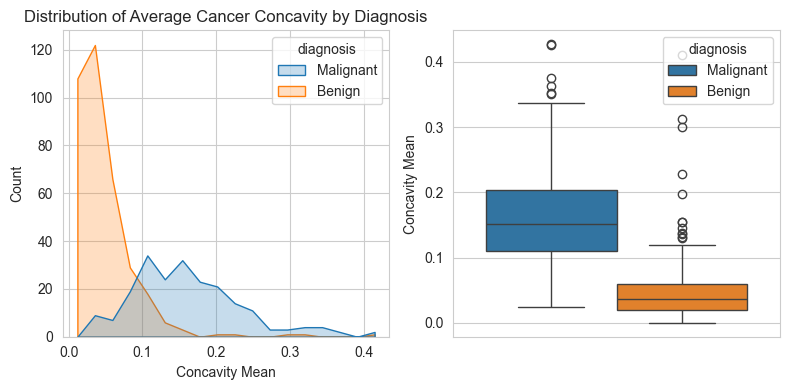

In [72]:
distribution_plot(data, "concavity_mean")

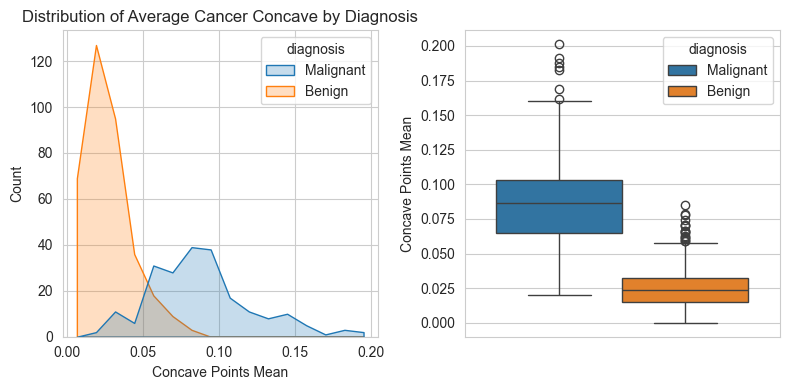

In [74]:
distribution_plot(data, "concave points_mean")

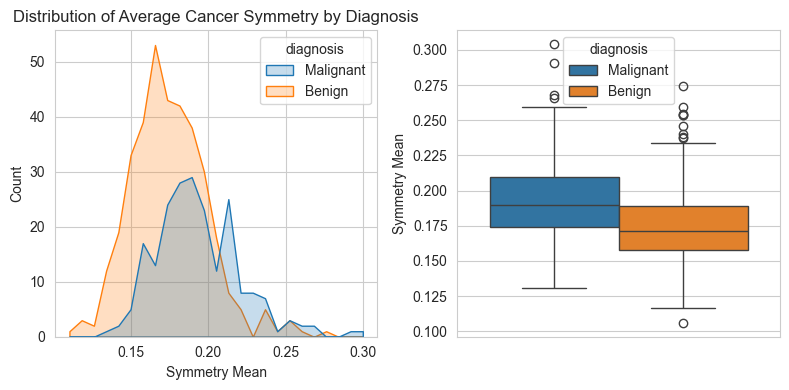

In [75]:
distribution_plot(data, "symmetry_mean")

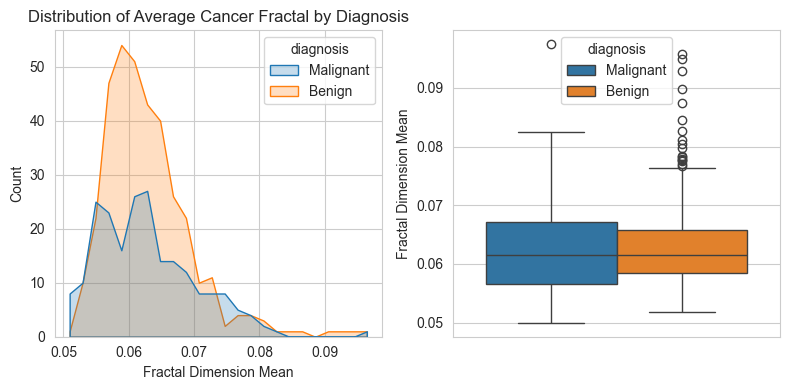

In [76]:
distribution_plot(data, "fractal_dimension_mean")

#### Standard Error

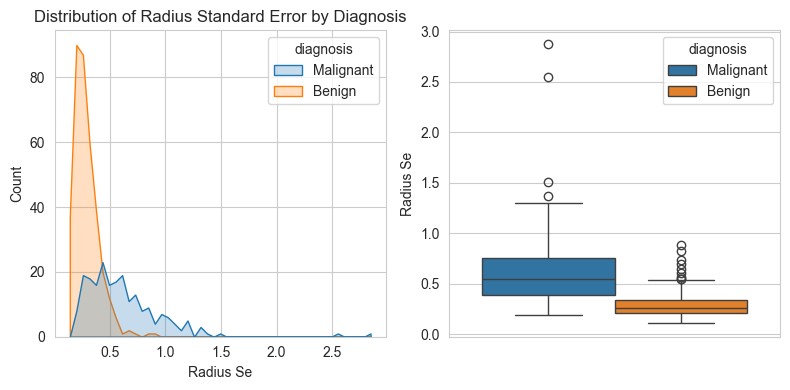

In [9]:
distribution_plot(data, "radius_se")

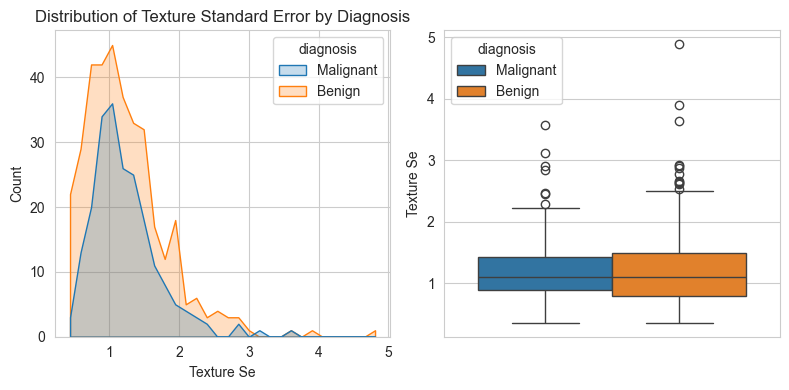

In [10]:
distribution_plot(data, "texture_se")

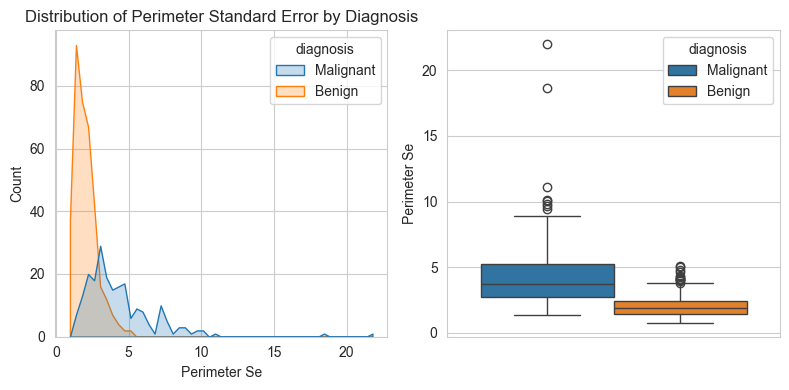

In [11]:
distribution_plot(data, "perimeter_se")

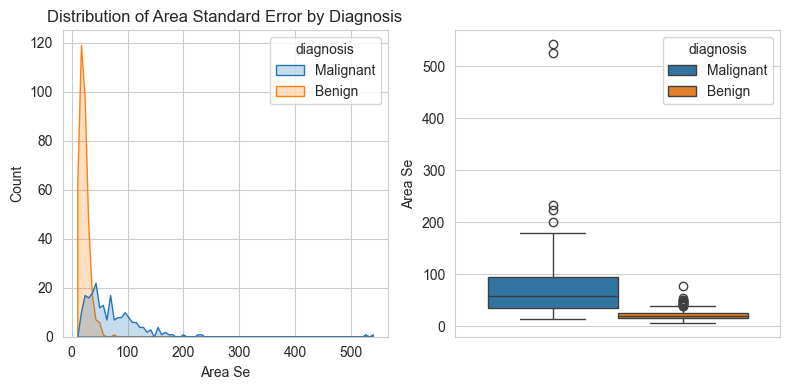

In [12]:
distribution_plot(data, "area_se")

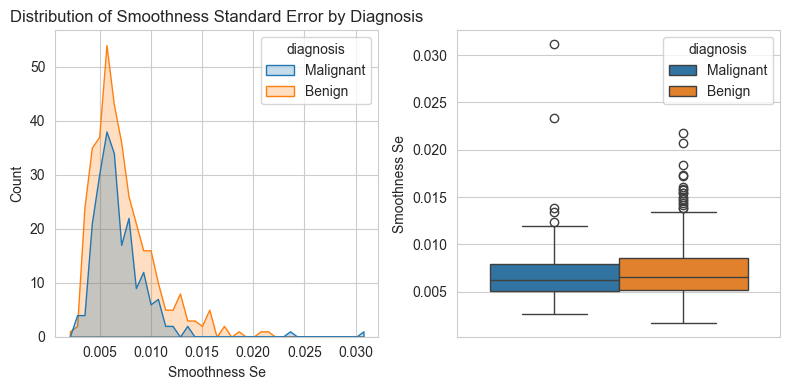

In [14]:
distribution_plot(data, "smoothness_se")

In [ ]:
distribution_plot(data, "compactness_se")

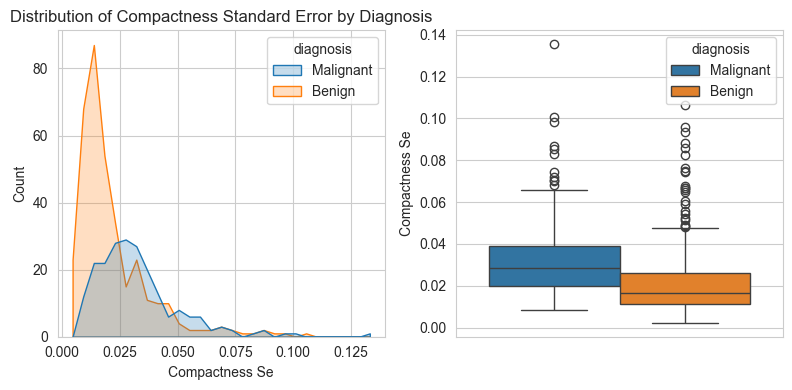

In [16]:
distribution_plot(data, "compactness_se")

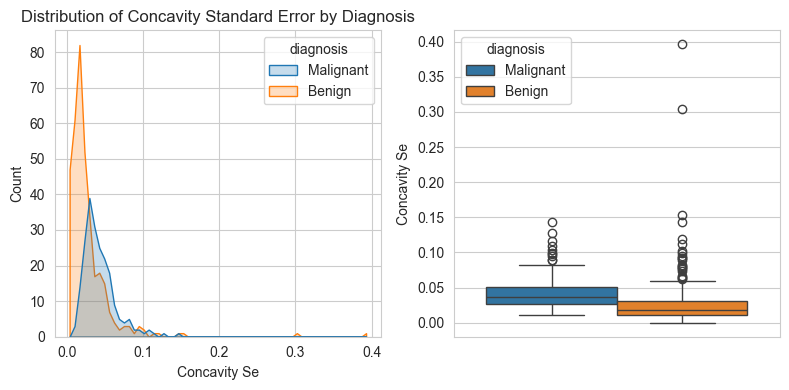

In [18]:
distribution_plot(data, "concavity_se")

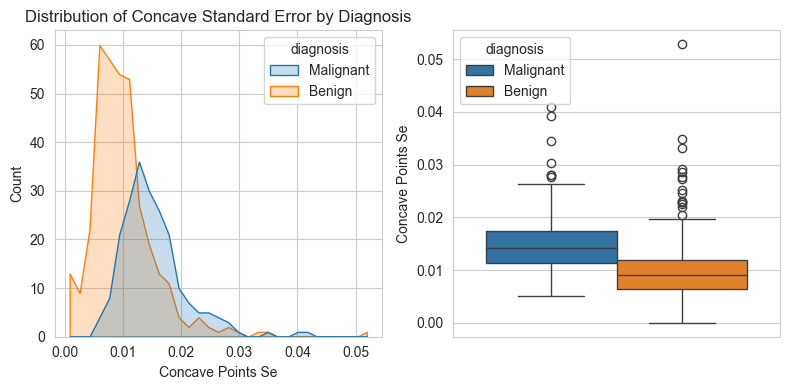

In [19]:
distribution_plot(data, "concave points_se")

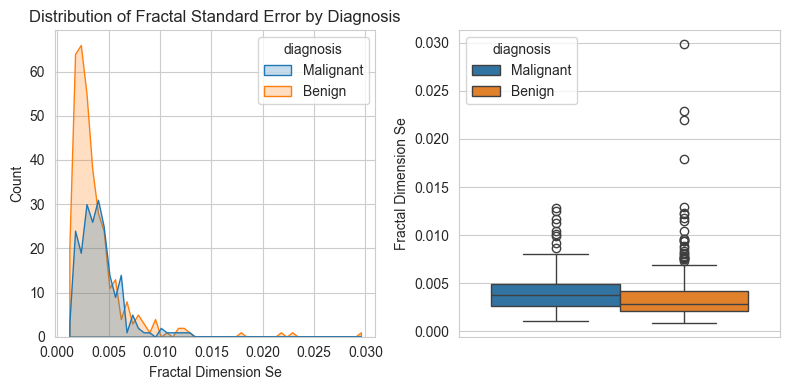

In [20]:
distribution_plot(data, "fractal_dimension_se")

#### Worst or Largest

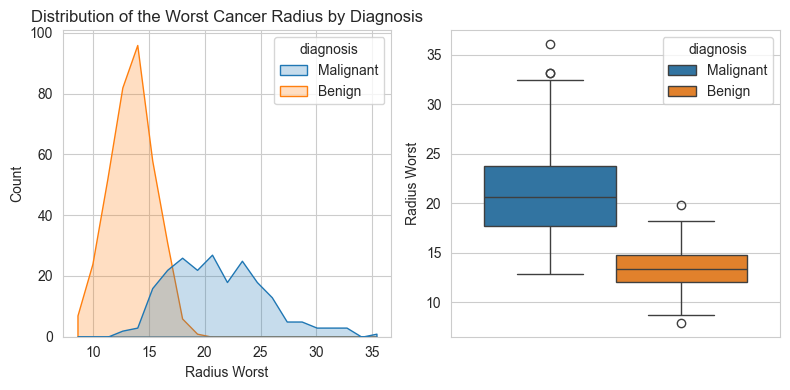

In [22]:
distribution_plot(data, "radius_worst")

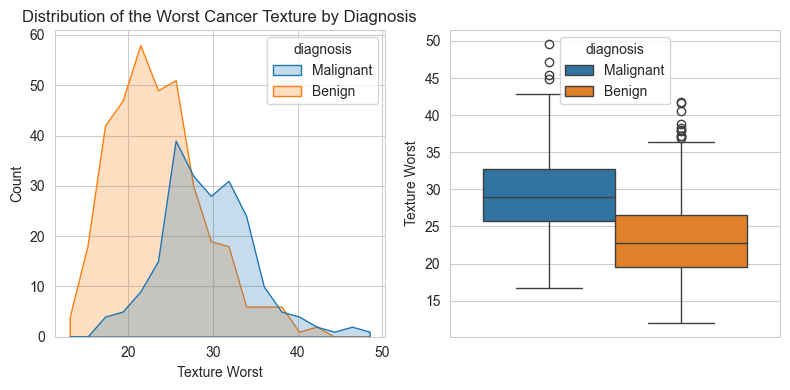

In [23]:
distribution_plot(data, "texture_worst")

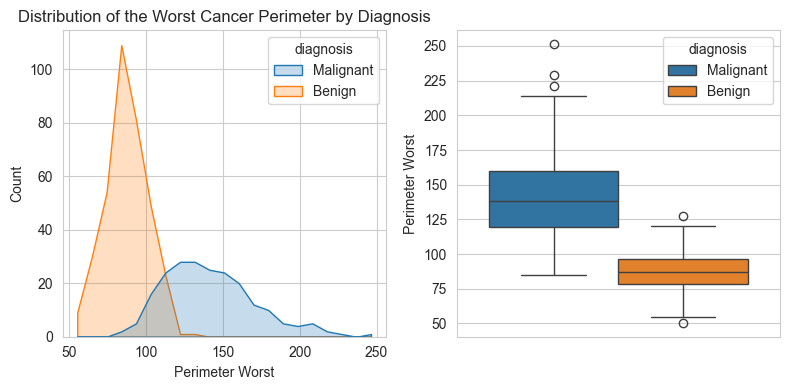

In [24]:
distribution_plot(data, "perimeter_worst")

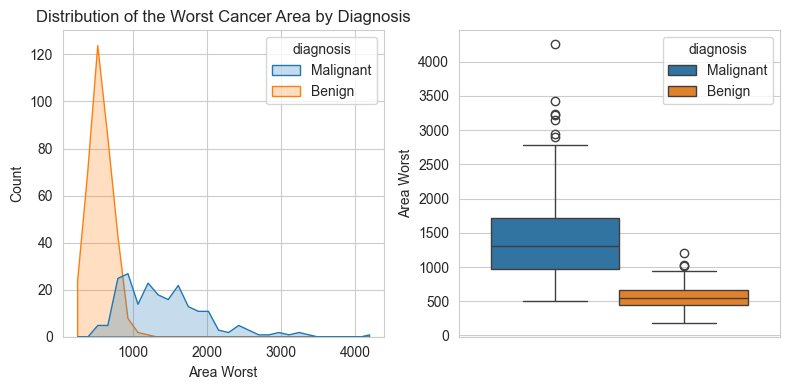

In [25]:
distribution_plot(data, "area_worst")

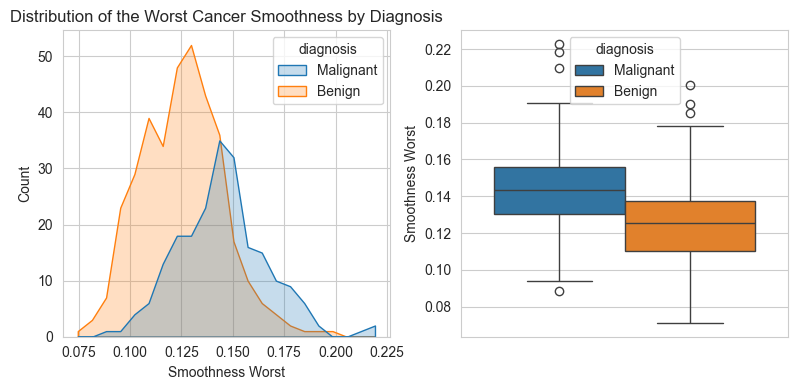

In [27]:
distribution_plot(data, "smoothness_worst")

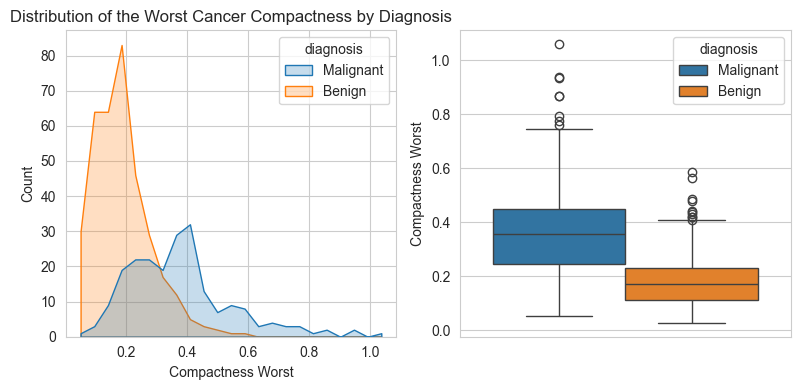

In [28]:
distribution_plot(data, "compactness_worst")

In [29]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

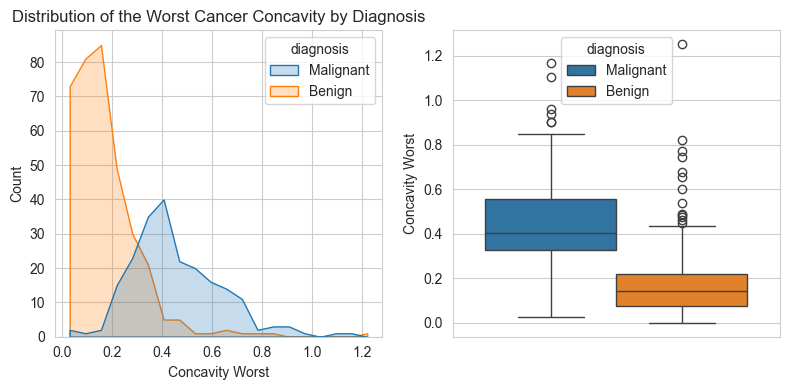

In [30]:
distribution_plot(data, "concavity_worst")

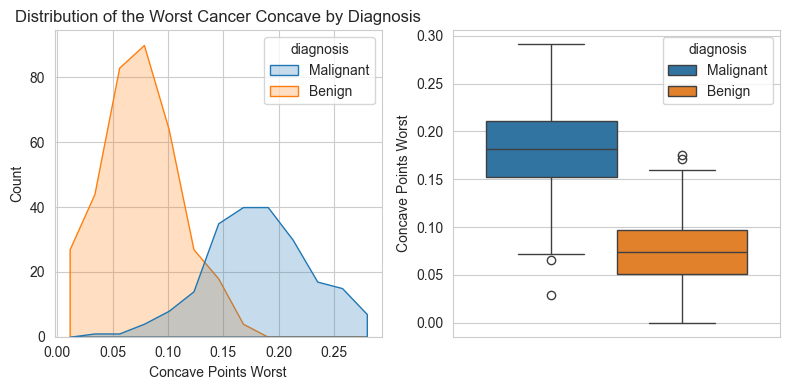

In [31]:
distribution_plot(data, "concave points_worst")

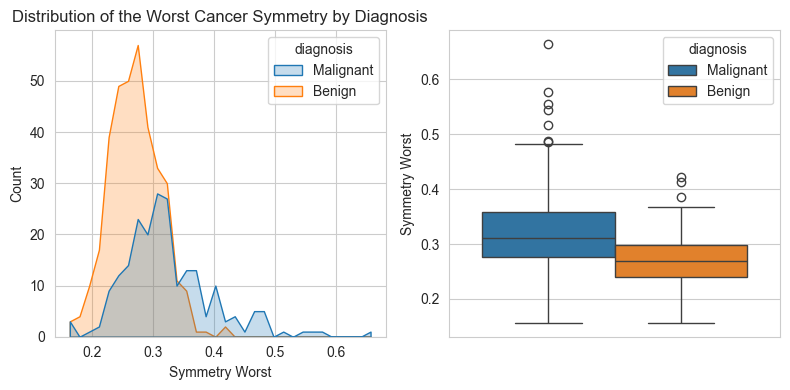

In [32]:
distribution_plot(data, "symmetry_worst")

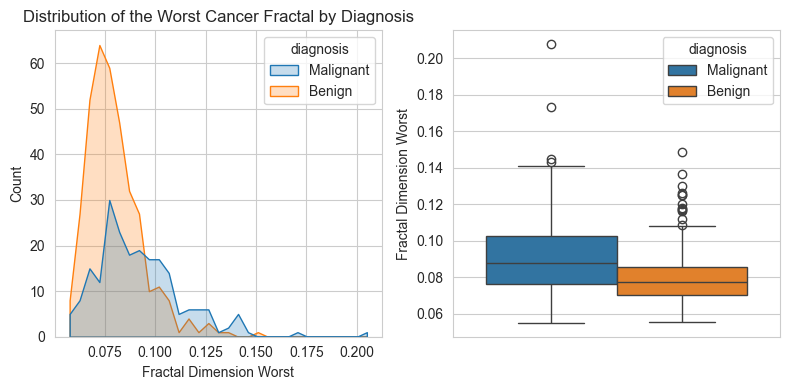

In [33]:
distribution_plot(data, "fractal_dimension_worst")

### Feature Relationship

In [9]:
def point_chart(data:pd.DataFrame, var_x:str, var_y:str, plt_title:str):

    fig = plt.figure(figsize=(4, 3))

    x_lab = str.replace(var_x, "_", " ").title()
    y_lab = str.replace(var_y, "_", " ").title()

    sns.scatterplot(
        data=data,
        x=var_x, y=var_y, hue="diagnosis",
        palette=sns.color_palette("Set1")
    )
    plt.xlabel(x_lab.split(" ")[0])
    plt.ylabel(y_lab.split(" ")[0])
    plt.title(plt_title)


#### Radius & Area

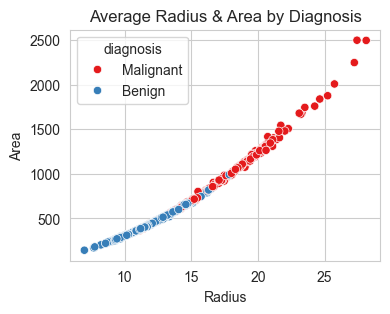

In [10]:
point_chart(
    data, 
    "radius_mean", 
    "area_mean",
    "Average Radius & Area by Diagnosis"
)
plt.savefig("image/radius_area_mean.png", bbox_inches="tight")

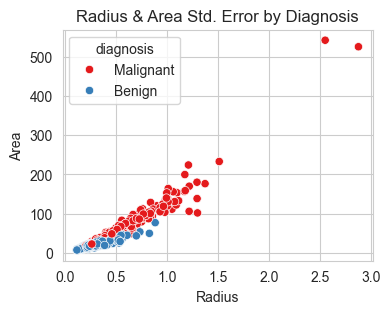

In [11]:
point_chart(
    data, 
    "radius_se", 
    "area_se",
    "Radius & Area Std. Error by Diagnosis"
)
plt.savefig("image/radius_area_se.png", bbox_inches="tight")

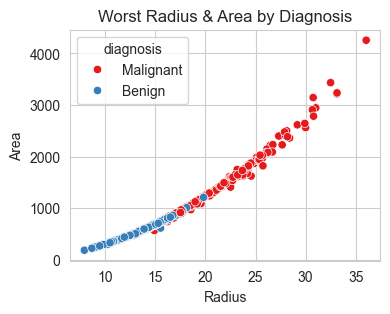

In [12]:
point_chart(
    data, 
    "radius_worst", 
    "area_worst",
    "Worst Radius & Area by Diagnosis"
)
plt.savefig("image/radius_area_worst.png", bbox_inches="tight")

#### Radius & Perimeter

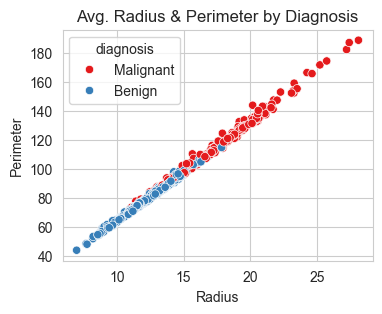

In [13]:
point_chart(
    data, 
    "radius_mean", 
    "perimeter_mean",
    "Avg. Radius & Perimeter by Diagnosis"
)
plt.savefig("image/radius_perimeter_mean.png", bbox_inches="tight")

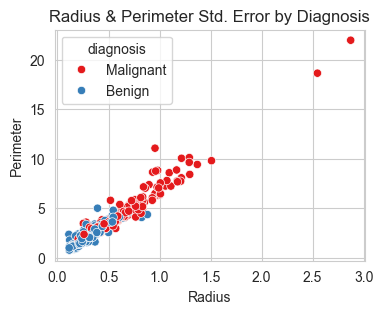

In [14]:
point_chart(
    data, 
    "radius_se", 
    "perimeter_se",
    "Radius & Perimeter Std. Error by Diagnosis"
)
plt.savefig("image/radius_perimeter_se.png", bbox_inches="tight")

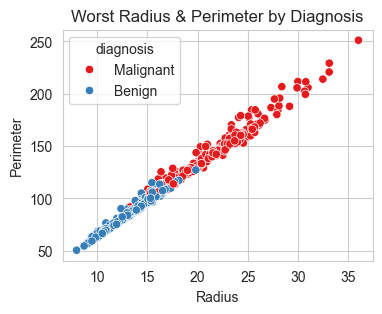

In [15]:
point_chart(
    data, 
    "radius_worst", 
    "perimeter_worst",
    "Worst Radius & Perimeter by Diagnosis"
)
plt.savefig("image/radius_perimeter_worst.png", bbox_inches="tight")

#### Texture

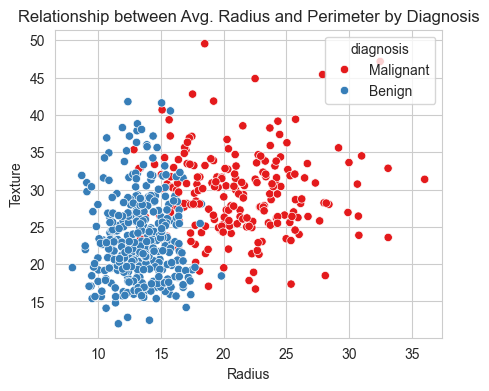

In [60]:
point_chart(
    data, 
    "radius_worst", 
    "texture_worst",
    "Relationship between Avg. Radius and Perimeter by Diagnosis"
)

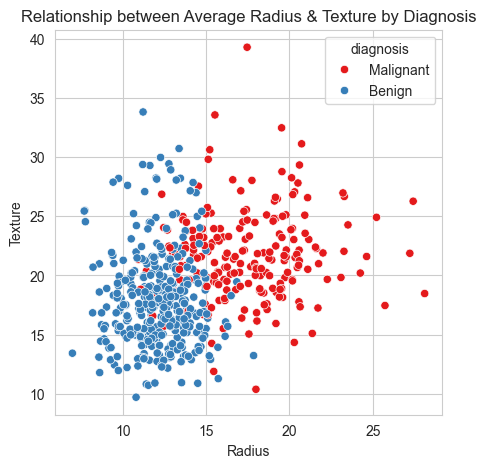

In [46]:
fig = plt.figure(figsize=(5, 5))

sns.scatterplot(
    data=data,
    x="radius_mean", y="texture_mean", hue="diagnosis",
     palette=sns.color_palette("Set1")
)
plt.xlabel("Radius")
plt.ylabel("Texture")
plt.title("Relationship between Average Radius & Texture by Diagnosis")
plt.show()

### Correlated Features

In [38]:
temp_df = data.copy()
temp_df["diagnosis"] = data["diagnosis"].map({"Benign": 0, "Malignant": 1})
temp_df = temp_df[[cols for cols in data.columns if "radius" in cols or "area" in cols or "perimeter" in cols] + ["diagnosis"]]

In [46]:
temp_df

,radius_mean,perimeter_mean,area_mean,radius_se,perimeter_se,area_se,radius_worst,perimeter_worst,area_worst,diagnosis
0,17.99,122.80,1001.0,1.0950,8.589,153.40,25.380,184.60,2019.0,1
1,20.57,132.90,1326.0,0.5435,3.398,74.08,24.990,158.80,1956.0,1
2,19.69,130.00,1203.0,0.7456,4.585,94.03,23.570,152.50,1709.0,1
3,11.42,77.58,386.1,0.4956,3.445,27.23,14.910,98.87,567.7,1
4,20.29,135.10,1297.0,0.7572,5.438,94.44,22.540,152.20,1575.0,1
...,...,...,...,...,...,...,...,...,...,...
564,21.56,142.00,1479.0,1.1760,7.673,158.70,25.450,166.10,2027.0,1
565,20.13,131.20,1261.0,0.7655,5.203,99.04,23.690,155.00,1731.0,1
566,16.60,108.30,858.1,0.4564,3.425,48.55,18.980,126.70,1124.0,1
567,20.60,140.10,1265.0,0.7260,5.772,86.22,25.740,184.60,1821.0,1
